# Animate Jumps Files

In [1]:
import numpy as np
import scipy
import scipy.optimize
from scipy.optimize import curve_fit
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.colors as mcolors
from mpl_toolkits import mplot3d
import glob
import time
import pandas as pd
from PIL import Image
from scipy.stats import gaussian_kde
import seaborn as sns

plt.rcParams["figure.figsize"] = (3,3)

print (time.ctime())

Wed Feb  3 08:23:45 2021


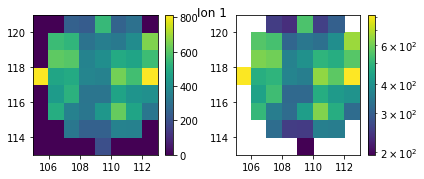

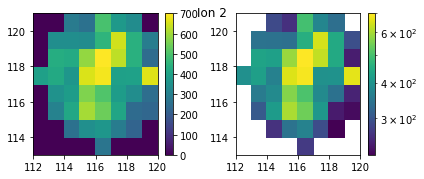

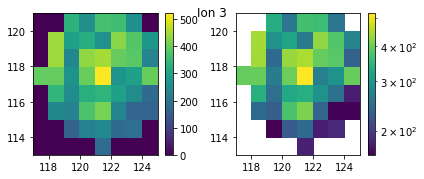

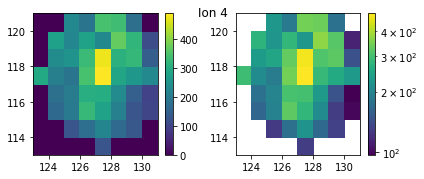

In [2]:
import choose_file 
choose_file.Jumps_Six_350V_1()

In [12]:
n=0  # indexing variable for image saving

# This next part takes from external modules that have been made to call certain file names
# Dataframes were previously created in those files which are set as global variables in the cell above
filename = choose_file.filename
old_data_table = choose_file.old_data_table
used_data = old_data_table

# Defining the range of time values for which to do the animation. This can be changed to only
# use part of the timeframe in the file if you want to animate a specific moment. 
t = used_data['time']
Tmin = t.min()
Tmax = t.max()

pbins = 50  #positional bins. single variable for square plots. [xbins, ybins] otherwise
#tbins = int(1000/4.98e+13*(Tmax-Tmin)) #number of time slices to be used for the animation
tbins = int(1000/4.98e+2*(Tmax-Tmin)) #number of time slices to be used for the animation
            
print (f'Tmin =, {Tmin:.2e},  Tmax = , {Tmax:.2e}, length = , {(Tmax-Tmin):.2e}')

Tbin = (Tmax - Tmin)/tbins  # This is the for loop that creates all of the separate images
for i in range(0,tbins):
    if (i/10).is_integer() is True:  # simply print statement that lets you know how fast the code is running
                print(i)
    start = Tmin+ i*Tbin; stop = start + Tbin # creating the equally sized bins
    used = (old_data_table
             .query(f"{start}< time <{stop}"))
    
    ### Plotting Parameters ###
    fig, (ax1) = plt.subplots(ncols=1, figsize=(6,6))
    plt.rc('xtick',labelsize=8)
    plt.rc('ytick',labelsize=8)
    d = ax1.hist2d(used['x'], used['y'], bins=pbins, range = [(85,135), (90,140)], vmax=28/4.98e+13*(Tmax-Tmin))
    ax1.set_title(f'{filename}', fontsize=25)
    ax1.set_xlabel('x (pixels)', fontsize=10)
    ax1.set_ylabel('y (pixels)', fontsize=10)
    #ax1.yaxis.set_visible(False)
    #ax1.xaxis.set_visible(False)
    fig.tight_layout()

    ## Saving Figure ## make sure there is a properly named folder to save the files
    fig.savefig(f'Animation Image Storage/{filename}/{n}.png')
    plt.close(fig)
    n=n+1

images = [] 
n=0

## GIF Creation ## 
for i in range(0,tbins):
    h = Image.open(f'Animation Image Storage/{filename}/{n}.png') # Pulls the properly ordered images and assembles them
    images.append(h)
    n=n+1
    

## Save GIF ## again, needs the proper folder to already exist. 
images[0].save(f'Jumps GIFs/{filename}.gif',
                save_all=True,
                append_images=images[1:],
                duration=100,
                loop=0)

Tmin =, 0.00e+00,  Tmax = , 1.66e+02, length = , 1.66e+02
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
